<a href="https://colab.research.google.com/github/marcelorandolfo/data-science/blob/master/Analisando_a_viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Analisando a Violência no Rio de Janeiro

Qualquer pessoa que tenha assistido noticiários na TV ou lido alguma reportagem nos últimos meses têm a mesma sensação: a violência está tomando conta das cidades!

Infelizmente, os casos de violência mais noticiados são aqueles que ocorrem no estado do Rio de Janeiro. Claro que em qualquer lugar seria uma pena ver a violência crescer tanto, mas ver um lugar tão bonito como o Rio de Janeiro cercado de tantos casos policiais é angustiante.

Com a Lei de Acesso a Informação e o aumento da conscientização de orgãos públicos quanto a coleta, divulgação e utilização de dados, o governo do estado do Rio de Janeiro trouxe a iniciativa [ISP Dados Abertos](http://www.ispdados.rj.gov.br/). No portal é possível obter dados de registros criminais e atividades policiais no estado, obtidas a partir de Registros de Ocorrências feitos nas delegacias da Polícia Civil do estado do Rio de Janeiro e informações complementares de orgãos ligados a Polícia Militar do estado.

O objetivo aqui é fazer uma análise estatística das séries históricas disponibilizadas no portal.

## Obtenção dos Dados

O *dataset* foi obtido na página de [Estatísticas de Segurança](http://www.ispdados.rj.gov.br/estatistica.html) do portal ISP Dados Abertos, e serão utilizadas as séries históricas de ocorrências criminais no estado em valores absolutos. A periodicidade dos dados é mensal e contêm informações desde 1991.

Como forma de controlar a qualidade das informações divulgadas, os registros de ocorrência são submetidos à Corregedoria Interna da Polícia Civil (COINPOL) antes de serem disponibilizados pelo Instituto de Segurança Pública no portal.

O arquivo `csv` utilizado pode ser obtido diretamente pelo [portal](http://www.ispdados.rj.gov.br/estatistica.html) ou por este [link](https://raw.githubusercontent.com/marcelorandolfo/data-science/master/data/violencia_rio_1991.csv).

### Importando pacotes



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline

### Importando os dados

O *dataset* utilizado está no meu diretório no [GitHub](https://github.com/marcelorandolfo/data-science). Eu preferi usar o arquivo diretamente pelo GitHub pra evitar que em outra ocasião o portal ISP Dados Abertos esteja indisponível ou que o arquivo seja alterado. Os dados que serão utilizados foram baixados em dezembro de 2019.

In [0]:
# obtendo o dataset e visualizando as primeiras 5 entradas.

df = pd.read_csv('https://raw.githubusercontent.com/marcelorandolfo/data-science/master/data/violencia_rio_1991.csv')
df.head()

,vano;mes;hom_doloso;lesao_corp_morte;latrocinio;hom_por_interv_policial;letalidade_violenta;tentat_hom;lesao_corp_dolosa;estupro;hom_culposo;lesao_corp_culposa;roubo_comercio;roubo_residencia;roubo_veiculo;roubo_carga;roubo_transeunte;roubo_em_coletivo;roubo_banco;roubo_cx_eletronico;roubo_celular;roubo_conducao_saque;roubo_apos_saque;roubo_bicicleta;outros_roubos;total_roubos;furto_veiculos;furto_transeunte;furto_coletivo;furto_celular;furto_bicicleta;outros_furtos;total_furtos;sequestro;extorsao;sequestro_relampago;estelionato;apreensao_drogas;posse_drogas;trafico_drogas;apreensao_drogas_sem_autor;recuperacao_veiculos;apf;aaapai;cmp;cmba;ameaca;pessoas_desaparecidas;encontro_cadaver;encontro_ossada;pol_militares_mortos_serv;pol_civis_mortos_serv;indicador_cvli;indicador_roubo_rua;indicador_roubo_veic;indicador_roubo_carga;registro_ocorrencias;fase
0,1991;1;657; ;15; ;672;162;3051; ; ; ;350;188;1...
1,1991;2;732; ;17; ;749;175;3421; ; ; ;357;171;1...
2,1991;3;713; ;25; ;738;216;3613; ; ; ;443;191;1...
3,1991;4;634; ;20; ;654;200;3211; ; ; ;425;199;1...
4,1991;5;650; ;20; ;670;146;3051; ; ; ;553;231;1...


O significado de `csv` é *comma-separated-values* (valores separados por vírgulas) ou seja, várias séries são compiladas lado a lado e a forma de separá-las é utilizando uma vírgula, `,`. Entretanto, arquivos `csv` brasileiros são separados por ponto e vírgula, `;`, e isso ocorre pois utilizamos vírgulas para separar casas decimais.

O *default* da função `pd.read_csv` para o separador é vírgula (`,`), no caso desse arquivo, temos que indicar na função que o separador na verdade é ponto e vírgula (`;`). 

In [0]:
# obtendo o dataset e visualizando as primeiras 5 entradas.

df = pd.read_csv('https://raw.githubusercontent.com/marcelorandolfo/data-science/master/data/violencia_rio_1991.csv', sep = ';')
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
0,1991,1,657,,15,,672,162,3051,,,,350,188,1174,63,967,381,37,,,,,,158,3318,2009,1147,,,,3561,6717,,,,,133,,,,872,,,,,,,217,,,,,1348,1174,63,,3
1,1991,2,732,,17,,749,175,3421,,,,357,171,1097,64,963,432,35,,,,,,142,3261,1850,1066,,,,3309,6225,,,,,127,,,,751,,,,,,,209,,,,,1395,1097,64,,3
2,1991,3,713,,25,,738,216,3613,,,,443,191,1265,71,963,422,43,,,,,,131,3529,2084,1062,,,,3573,6719,,,,,80,,,,789,,,,,,,188,,,,,1385,1265,71,,3
3,1991,4,634,,20,,654,200,3211,,,,425,199,1415,81,1186,354,36,,,,,,112,3808,2085,1195,,,,3290,6570,,,,,133,,,,787,,,,,,,140,,,,,1540,1415,81,,3
4,1991,5,650,,20,,670,146,3051,,,,553,231,1449,82,931,335,27,,,,,,147,3755,2185,723,,,,3546,6454,,,,,163,,,,845,,,,,,,78,,,,,1266,1449,82,,3


O problema da separação foi resolvido, mas se observarmos o *dataset* podemos ver outro problema. Por exemplo, na coluna `lesao_corp_morte` não há os 5 primeiros valores. Mas ao invés de estar indicado como `NaN` (*not a number*), está um espaço vazio.

Para resolver esse problema, temos que indicar na função `pd.read_csv` que  considere espaços vazios como um `NaN`.

In [0]:
# obtendo o dataset e visualizando as primeiras 5 entradas.

df = pd.read_csv('https://raw.githubusercontent.com/marcelorandolfo/data-science/master/data/violencia_rio_1991.csv', sep = ';', na_values=' ')
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,672,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,1348,1174,63,NaN,3
1,1991,2,732,NaN,17,NaN,749,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,1395,1097,64,NaN,3
2,1991,3,713,NaN,25,NaN,738,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,1385,1265,71,NaN,3
3,1991,4,634,NaN,20,NaN,654,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,1540,1415,81,NaN,3
4,1991,5,650,NaN,20,NaN,670,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,1266,1449,82,NaN,3


A última modificação a ser feita antes das análises é em relação ao index do `DataFrame`. Dentro do `DataFrame` temos as colunas `vano` e `mes`, relativos ao período da entrada em questão. Mas é mais interessante ter esses valores no index e não dentro do `DataFrame`.

Logo, vamos construir o index a partir dos períodos. Temos que a primeira entrada do `DataFrame` é de Janeiro de 1991. Pra saber a data da última entrada basta exibir a última linha do `DataFrame`.

In [0]:
df.tail(1)

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
2019/10,317,4.0,4,144.0,469,430,5717,532.0,179.0,2373.0,359,91,3027,581,6264,1109,1,6.0,2184.0,8.0,83.0,18.0,1819,15550,1198,1545,701.0,1892.0,239.0,7584,13159,0.0,152.0,14.0,4182.0,1910,766.0,1008.0,168.0,1813,2937.0,538.0,1791.0,282.0,5303.0,425.0,17,2.0,3.0,0.0,325.0,9557,3027,581,65855.0,2


Nesse caso, nossos dados vão de Janeiro de 1991 até Outubro de 2019. Agora basta reconstruir o index do `DataFrame`.

In [0]:
# modificando o index do DataFrame
df = df.set_index(pd.date_range(start = '1/1/1991', freq= 'M', periods=df.shape[0]))

# convertendo a data para exibir somente o ano e o mês
df.index = df.index.strftime('%Y/%m')

# observar as 5 primeiras entradas
df.head()


,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
1991/01,1991,1,657,NaN,15,NaN,672,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,1348,1174,63,NaN,3
1991/02,1991,2,732,NaN,17,NaN,749,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,1395,1097,64,NaN,3
1991/03,1991,3,713,NaN,25,NaN,738,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,1385,1265,71,NaN,3
1991/04,1991,4,634,NaN,20,NaN,654,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,1540,1415,81,NaN,3
1991/05,1991,5,650,NaN,20,NaN,670,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,1266,1449,82,NaN,3


In [0]:
# observando as 5 últimas entradas
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
2019/06,2019,6,332,3.0,8,153.0,496,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,343.0,9551,3115,599,61202.0,3
2019/07,2019,7,309,5.0,10,194.0,518,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,324.0,10071,3198,691,65817.0,2
2019/08,2019,8,318,1.0,6,170.0,495,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,325.0,9912,3181,587,65285.0,2
2019/09,2019,9,308,6.0,7,153.0,474,344,4797,482.0,149.0,2359.0,364,80,2613,467,5794,996,0,2.0,2067.0,9.0,80.0,20.0,1445,13937,1194,1341,598.0,1454.0,211.0,6839,11637,0.0,157.0,7.0,3344.0,1773,699.0,942.0,157.0,1903,2781.0,464.0,1987.0,247.0,4789.0,399.0,19,13.0,4.0,0.0,321.0,8857,2613,467,59844.0,2
2019/10,2019,10,317,4.0,4,144.0,469,430,5717,532.0,179.0,2373.0,359,91,3027,581,6264,1109,1,6.0,2184.0,8.0,83.0,18.0,1819,15550,1198,1545,701.0,1892.0,239.0,7584,13159,0.0,152.0,14.0,4182.0,1910,766.0,1008.0,168.0,1813,2937.0,538.0,1791.0,282.0,5303.0,425.0,17,2.0,3.0,0.0,325.0,9557,3027,581,65855.0,2


Como agora as informações em relação ao período das entradas está no index, não necessitamos mais das colunas `vano` e `mes`.

In [0]:
# excluindo as colunas vano e mes
df.drop(['vano','mes'], axis=1, inplace=True)

# observar as 5 primeiras entradas
df.head()

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
1991/01,657,NaN,15,NaN,672,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,1348,1174,63,NaN,3
1991/02,732,NaN,17,NaN,749,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,1395,1097,64,NaN,3
1991/03,713,NaN,25,NaN,738,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,1385,1265,71,NaN,3
1991/04,634,NaN,20,NaN,654,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,1540,1415,81,NaN,3
1991/05,650,NaN,20,NaN,670,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,1266,1449,82,NaN,3


Agora o `DataFrame` está pronto para as análises.

## Análise Inicial dos Dados

Ao analisar qualquer *dataset* temos que entender o que as colunas, ou variáveis, representam. No `DataFrame` que estamos analisando, temos variáveis que conseguimos saber seu significado pelo nome da coluna, como por exemplo: `hom_doloso` (número de homicídios doloso) ou `furto_celular` (número de ocorrências de furto de celular). Mas não é viável confiar somente no nome das variáveis, pois temos, por exemplo, as variáveis `apf`, `cmp`, `cmba` que não são de compreensão imediata.

Dentro do portal ISP Dados Abertos, há a página de [Notas Metodológicas e Dicionários](http://www.ispdados.rj.gov.br/Notas.html), onde o Instituto de Segurança Pública do estado do Rio de Janeiro disponibiliza informações sobre o que essas variáveis representam.

Para o `DataFrame` que estamos utilizando as variáveis representam o número de casos registrados para as seguintes ocorrências:




In [0]:
# obtendo o dicionário de variáveis
df_xlsx = pd.read_excel('https://github.com/marcelorandolfo/data-science/blob/master/data/dicionario_crime_rio.xlsx?raw=true', skiprows = 3, index_col=0, usecols = [0,1, 5])

# dropando as variáveis que já foram removidas do dataset
df_xlsx.drop(['mes','vano'], axis=0, inplace=True)

# aumentando a largura da coluna de descrição da variável
pd.set_option('display.max_colwidth', -1)

# preenchendo os valores ausentes da coluna grupo
df_xlsx['Grupo'].fillna(method= 'ffill', inplace=True)
df_xlsx['Grupo'] = df_xlsx['Grupo'].str.capitalize()
df_xlsx['Grupo'].fillna('Fase', inplace=True)

# dicionário de variáveis
df_xlsx

,Descrição da variável,Grupo
Variável,,
fase,2 - Consolidado sem errata 3 - Consolidado com errata,Fase
hom_doloso,Homicídio doloso,Vítimas de crimes violentos
lesao_corp_morte,Lesão corporal seguida de morte,Vítimas de crimes violentos
latrocinio,Latrocínio (roubo seguido de morte),Vítimas de crimes violentos
hom_por_interv_policial,Morte por intervenção de agente do Estado,Vítimas de crimes violentos
letalidade_violenta,Letalidade violenta,Vítimas de crimes violentos
tentat_hom,Tentativa de homicídio,Vítimas de crimes violentos
lesao_corp_dolosa,Lesão corporal dolosa,Vítimas de crimes violentos
estupro,Estupro,Vítimas de crimes violentos


Tendo agora o `DataFrame` pronto e sabendo o significado das variáveis, é interessante entender a sua composição.

#### **Q1: Qual é o tamanho do DataFrame?**

In [0]:
# obtendo o tamanho DataFrame

print('Número de entradas do DataFrame:\t {}'.format(df.shape[0]))
print('Número de variáveis do DataFrame:\t {}'.format(df.shape[1]))

Número de entradas do DataFrame:	 346
Número de variáveis do DataFrame:	 56


#### **Q2: Quais são os tipos das variáveis?**

In [0]:
# tipos das variáveis

df.dtypes.sort_values()

hom_doloso                    int64  
indicador_roubo_carga         int64  
indicador_roubo_veic          int64  
indicador_roubo_rua           int64  
encontro_cadaver              int64  
recuperacao_veiculos          int64  
apreensao_drogas              int64  
total_furtos                  int64  
outros_furtos                 int64  
furto_transeunte              int64  
furto_veiculos                int64  
total_roubos                  int64  
outros_roubos                 int64  
roubo_banco                   int64  
roubo_em_coletivo             int64  
fase                          int64  
roubo_carga                   int64  
latrocinio                    int64  
letalidade_violenta           int64  
tentat_hom                    int64  
roubo_transeunte              int64  
roubo_comercio                int64  
roubo_residencia              int64  
lesao_corp_dolosa             int64  
roubo_veiculo                 int64  
roubo_bicicleta               float64
lesao_corp_m

#### **Q3: Qual a porcentagem de valores ausentes?**

In [0]:
# obtendo os valores ausentes do DataFrame

(df.isnull().sum() / df.shape[0] ).sort_values(ascending = False)

roubo_bicicleta               0.797688
furto_bicicleta               0.797688
apf                           0.520231
posse_drogas                  0.520231
trafico_drogas                0.520231
apreensao_drogas_sem_autor    0.520231
cmba                          0.520231
cmp                           0.520231
aaapai                        0.520231
furto_coletivo                0.416185
estupro                       0.416185
extorsao                      0.416185
sequestro_relampago           0.416185
estelionato                   0.416185
roubo_apos_saque              0.416185
furto_celular                 0.416185
pol_militares_mortos_serv     0.416185
pol_civis_mortos_serv         0.416185
roubo_cx_eletronico           0.416185
roubo_conducao_saque          0.416185
pessoas_desaparecidas         0.381503
encontro_ossada               0.381503
roubo_celular                 0.312139
ameaca                        0.277457
indicador_cvli                0.277457
sequestro                

As variáveis do número de ocorrências que não apresentam valores nulos são aquelas que são registradas desde o começo da série, janeiro de 1991. Com o tempo, foi acrescido ao *dataset* informações de outras ocorrências criminais, e é possível observar que os últimos tipos de ocorrências adicionadas foram de roubo e furto de bicicleta.

Como boa parte da análise que será feita aqui é sobre as séries históricas de ocorrências criminais individualmente, a presença de valores nulos não é um problema.

## Informações Estatísticas da Violência no Rio de Janeiro

Ao analisar o tamanho do `DataFrame`, vimos que temos 346 entradas e 56 variáveis. Analisar as 56 variáveis individualmente é um trabalho maçante, tanto na execução da análise quanto na interpretação. É mais interessante analisar as ocorrências criminais separando-as em grupos.

O próprio Instituto de Segurança Pública divide as ocorrências criminais em grupos. São eles: crimes violentos, crimes de trânsito, roubos, furtos, crimes contra o patrimônio, atividades policiais, outros registros e indicadores de crimes. As únicas variáveis que não se enquadram em nenhum grupo são: `fase`, pois é um indicador se em determinada entrada teve ou não uma *errata*, e `registro_ocorrencias`, que nada mais é do que a soma de todas as ocorrências registradas no período.

Nesse caso, vamos dividir o `DataFrame` em sete grupos e duas variáveis isoladas para facilitar tanto a análise estatística descritiva, quanto a análise visual.

In [0]:
# separando dataset entre grupos segundo o dicionário de variáveis


df_crimes_violentos = df[df_xlsx.index[df_xlsx['Grupo'] == 'Vítimas de crimes violentos']]
df_crimes_transito = df[df_xlsx.index[df_xlsx['Grupo'] == 'Vítimas de crimes de trânsito']]
df_roubos = df[df_xlsx.index[df_xlsx['Grupo'] == 'Roubos']]
df_furtos = df[df_xlsx.index[df_xlsx['Grupo'] == 'Furtos']]
df_crimes_contra_patrimonio = df[df_xlsx.index[df_xlsx['Grupo'] == 'Outros registros de crime contra o patrimônio']]
df_atividade_policial = df[df_xlsx.index[df_xlsx['Grupo'] == 'Atividade policial']]
df_outros_registros = df[df_xlsx.index[df_xlsx['Grupo'] == 'Outros registros']]
df_indicadores = df[df_xlsx.index[df_xlsx['Grupo'] == 'Indicadores estratégicos']]


### Crimes violentos

In [0]:
df_crimes_violentos.describe().round(2)

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro
count,346.00,250.00,346.00,262.00,346.00,346.00,346.00,202.00
mean,503.45,4.34,15.61,72.48,577.08,318.66,5491.44,371.30
std,114.38,2.75,5.90,36.96,104.98,127.39,1510.34,94.93
min,272.00,0.00,2.00,10.00,334.00,122.00,2350.00,188.00
25%,412.25,2.00,11.00,42.25,500.00,200.25,4109.75,282.75
50%,506.00,4.00,15.00,70.00,589.50,321.00,5803.00,386.50
75%,577.00,6.00,19.00,97.00,648.00,398.75,6579.00,442.00
max,831.00,21.00,36.00,194.00,848.00,645.00,9050.00,561.00


Analisando as estatísticas descritivas para as ocorrências criminais consideradas como *crimes violentos*, podemos observar que:

* Como as ocorrências estão mensuradas em números absolutos por mês, podemos considerar que em média, ocorrem aproximadamente 503 casos de homicídios dolosos no estado do Rio de Janeiro. Uma média de mais de 15 casos por dia.
* Crimes de lesão corporal seguidas de morte apresentaram a menor média de ocorrência no período, dentre os crimes violentos. Mas ocorrências de lesão corporal apresentaram uma média de mais de 5000 casos por mês.
* A média e a mediana de ocorrências são bem proximas, indicando que as séries possuem uma distribuição centrada na média, ou seja, metade dos meses apresentam um número de ocorrências menores que a média e a outra metade maiores que a média.
* Porém, podemos observar que a diferença entre o terceiro quartil e o valor máximo é bem alta, com exceção de crimes de estupro. Em ocorrências de homicídio por intervenção policial a diferença é mais que o dobro. Essa característica indica que existem meses em que há um número elevado de ocorrências criminais.

### Crimes de trânsito

In [0]:
df_crimes_transito.describe()

,hom_culposo,lesao_corp_culposa
count,262.000000,250.000000
mean,211.751908,3402.404000
std,54.205119,778.638458
min,111.000000,848.000000
25%,176.000000,3022.750000
50%,203.000000,3363.500000
75%,235.500000,3731.500000
max,449.000000,6653.000000


Em relação a crimes de trânsito, temos que a média de lesão corporal culposa é superior a 3000 casos por mês, enquanto a média de homicídios culposos é de mais de 200 casos por mês. 

Assim como foi visto para os crimes violentos, crimes de trânsito também apresentam uma média semelhante a mediana.

Setenta e cinco porcento dos meses apresentam um número de ocorrências de homicídios culposos menor que 235. Mas o valor máximo de ocorrências em um mês foi de 449. Essa diferença indica que em algum mês houve um pico de ocorrências de homicídio culposo. O mesmo é observado para lesão corporal culposa. 

### Roubos

In [0]:
df_roubos.describe()

,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,202.000000,238.000000,202.000000,202.000000,70.000000,346.000000,346.000000
mean,454.465318,133.008671,2450.843931,341.384393,3433.609827,661.277457,9.323699,3.554455,967.785714,11.292079,145.029703,11.042857,1213.656069,9458.843931
std,119.628387,44.339957,788.059307,223.682707,2459.941122,298.289284,10.555821,2.629626,630.799446,6.378512,55.483036,7.778521,799.018630,4582.937672
min,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000
25%,364.250000,103.000000,1891.750000,209.500000,1054.500000,433.000000,2.000000,2.000000,551.500000,6.000000,103.000000,3.250000,812.750000,5125.750000
50%,433.000000,125.000000,2329.500000,287.000000,2947.000000,592.500000,4.000000,3.000000,718.500000,10.000000,149.000000,13.000000,1155.000000,9287.000000
75%,535.750000,151.000000,2780.000000,406.500000,5414.500000,784.750000,14.000000,5.000000,1315.750000,15.000000,179.500000,17.000000,1635.000000,11616.750000
max,914.000000,300.000000,5358.000000,1329.000000,9669.000000,1628.000000,54.000000,12.000000,2626.000000,37.000000,283.000000,26.000000,3661.000000,23203.000000


Por definição, um roubo é caracterizado por um crime onde há violência ou ameaça contra a vítima. Dentre os grupos definidos pelo Instituto de Segurança Pública, os crimes de roubo são os que apresentam mais tipos distintos, tendo desde roubos a comércio, transporte público e após saques em bancos. Em relação as estatísticas descritivas observa-se que:

* Roubo de veículo é a ocorrência criminal que apresenta a maior média por mês, cerca de 2450 ocorrências.
* Seguindo o padrão dos outros dois grupos, podemos observar que a média e a mediana são bem próximas. Metade do período analisado tem um número de ocorrências menor que a média, mas a outra metade dos períodos apresentaram um número de ocorrências mensais maior que a média.
* Entretanto, no grupo de roubos temos duas exceções quanto essa característica: roubo à banco e roubo de celular. Nesses dois tipos de crime, a média de ocorrências por mês é superior que a mediana. Isso pode ser explicado ao observar o valor máximo de ocorrências no período. Para roubos a banco, o valor máximo de ocorrências foi quase quatro vezes maior que o valor do terceiro quartil, enquanto para roubos de celular esse diferença foi de praticamente o dobro. O número de ocorrências em determinado período foi tão alto que acabou elevando a média de ocorrências.
* A característica da diferença entre o terceiro quartil e o valor máximo também vale para o total de ocorrências de crimes de roubo. A diferença entre ambos é elevada, logo, é possível inferir que existem meses em que há o número de ocorrências criminais apresenta um salto.

### Furtos

In [0]:
df_furtos.describe()

,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos
count,346.000000,346.000000,202.000000,202.000000,70.000000,346.000000,346.000000
mean,1671.904624,1518.482659,650.222772,1451.391089,127.671429,6001.364162,10444.534682
std,296.233593,969.080303,267.544770,368.121087,80.878460,1961.447676,3689.467052
min,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000
25%,1429.000000,735.000000,502.000000,1299.750000,13.500000,3984.000000,6708.000000
50%,1637.000000,1092.500000,715.000000,1492.500000,159.000000,6570.500000,10487.500000
75%,1833.000000,2331.500000,859.250000,1735.750000,183.000000,7596.750000,13865.500000
max,2630.000000,5368.000000,1036.000000,2215.000000,243.000000,9880.000000,18003.000000


De forma contrária ao roubo, o furto é caracterizado por um crime onde não há ameaça ou violência contra a vítima. Considerando o total de furtos, o número médio de ocorrências em um mês é de mais de 10000 casos. As estatísticas descritivas para as ocorrências de furto seguem o mesmo padrão observado nos grupos anteriores.

* Média e mediana próximas, indicam uma distribuição centrada na média.
* Valor máximo bastante superior ao valor do terceiro quartil, indicando períodos de alta no número de furtos. Essa característica pode ser observada principalmente na variável de furto a transeuntes, onde o valor máximo é mais que o dobro do valor do terceiro quartil.

Porém, nas variáveis de furtos em coletivos e furtos de bicicletas a diferença entre máximo e terceiro quartil não é tão elevada. Tanto que a média é menor que a mediana, ou seja, mais de metade dos meses apresentam um número de ocorrências superior a média.

### Crimes contra o patrimônio

In [0]:
df_crimes_contra_patrimonio.describe()

,sequestro,extorsao,sequestro_relampago,estelionato
count,250.000000,202.000000,202.000000,202.000000
mean,0.660000,133.475248,7.782178,2247.019802
std,0.957112,43.140081,5.083588,784.244384
min,0.000000,23.000000,0.000000,717.000000
25%,0.000000,110.000000,5.000000,1658.250000
50%,0.000000,133.000000,7.000000,2197.500000
75%,1.000000,152.750000,11.000000,2923.250000
max,5.000000,271.000000,31.000000,4182.000000


Com a exceção de crimes de estelionato, o grupo de ocorrência de crimes contra o patrimônio apresenta o menor número de casos. 

* A média de ocorrências de sequestro é de um caso por mês, mas se observarmos a mediana, temos que em metade de todos os meses analisados não houveram casos de sequestro. O valor máximo é de 5 sequestros em um determinado período, seguinte o padrão já observado se saltos no número de ocorrências.
* O número de casos de estelionato parece seguer o mesmo padrão para o valor máximo, mas com a diferença entre máximo e terceiro, além do desvio padrão, mais baixo, é possível inferir que o salto no número de ocorrências não é tão elevado quanto para os outros tipos de crime.

### Atividade policial

In [0]:
df_atividade_policial.describe()

,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba
count,346.000000,166.000000,166.000000,166.000000,346.000000,166.000000,166.000000,166.000000,166.000000
mean,1076.378613,610.722892,761.746988,185.861446,1772.734104,2326.084337,567.813253,1263.144578,85.228916
std,644.190460,245.209437,311.886512,36.099006,654.896747,649.312031,246.677451,361.733742,65.672341
min,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000
25%,715.500000,362.500000,436.750000,160.000000,1279.000000,1688.500000,333.250000,952.750000,46.000000
50%,980.500000,629.500000,816.500000,183.500000,1766.000000,2433.000000,530.000000,1267.000000,58.000000
75%,1576.000000,764.500000,1045.000000,207.750000,2199.500000,2906.500000,791.000000,1519.750000,93.000000
max,2543.000000,1160.000000,1282.000000,289.000000,3695.000000,3425.000000,1114.000000,2314.000000,350.000000


As ocorrências criminais relacionadas a atividade policial, seguem o padrão já observado de que a média de casos é semelhante a mediana. Indicando que os dados são distribuídos de forma centralizada na média, ou seja, metade do período analisado tem um número de ocorrências menor que a média, a outra metade apresenta um número de ocorrências maior que a média. Mas se observarmos a diferença entre o terceiro quartil e o valor máximo, não observa-se uma diferença relevante. Pela análise descritiva parece não haver um pico no número de ocorrências que foi visto nos tipos de ocorrências anteriores.

Mas temos duas exceções quanto a isso:

* No número de ocorrências de cumprimento de mandado de busca e apreensão, o valor máximo é bem superior ao valor do terceiro quartil, indicando que em algum período houve um aumento súbito no número de ocorrências.
* Para a variável de número de ocorrências de recuperação de veículos, ocorre o mesmo salto no número de casos. Porém, para a variável de recuperação de veículos esse fato é muito bom. Como temos no *dataset* variáveis de furto e roubo de veículos, é interessante observar a média da porcentagem de carros recuperados em relação a carros roubados ou furtados. 

In [0]:
print('Média da porcentagem de veículos recuperados em relação a veículos furtados ou roubados: {}'.format(
    (df['recuperacao_veiculos'] / (df['furto_veiculos'] + df['roubo_veiculo'])).mean()))


Média da porcentagem de veículos recuperados em relação a veículos furtados ou roubados: 0.4234191142903286


De acordo com o resultado, observa-se que em média pouco menos da metade dos veículos roubados ou furtados acabam sendo recuperados. 

### Outros registros

In [0]:
df_outros_registros.describe()

,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv
count,250.000000,214.000000,346.000000,214.000000,202.000000,202.000000
mean,5526.452000,434.915888,65.982659,3.341121,2.099010,0.336634
std,1097.416839,65.096407,34.559333,2.282921,1.759155,0.635238
min,1409.000000,236.000000,0.000000,0.000000,0.000000,0.000000
25%,4861.500000,390.000000,41.250000,2.000000,1.000000,0.000000
50%,5445.000000,427.000000,60.000000,3.000000,2.000000,0.000000
75%,6245.500000,481.000000,86.750000,4.000000,3.000000,0.750000
max,9034.000000,628.000000,217.000000,13.000000,10.000000,3.000000


Em relação aos outros registros criminais, observa-se as mesmas características das demais ocorrências: média e mediana próximas e terceiro quartil e valor máximo com uma diferença considerável. Mas cabe uma análise da diferença entre os resultados para a variável de policiais militares mortos em serviço e policiais civis mortos em serviço.

* Enquanto a média de ocorrências de policiais militares mortos em serviço é de aproximadamente dois casos por mês, para policiais civis esse valor é menor que um.
* Em 75% do período analisado, o número de ocorrências de policiais militares mortos em serviço por mês foi menor ou igual a 3, enquanto para policiais civis esse valor foi também menor que 1.
* Houve um período onde o número de ocorrências de policiais militares mortos em serviço chegou a 10 casos, enquanto o máximo de casos de policiais civis mortos em serviço foi de 3.

Essa distinção entre as estatísticas salienta a diferença do tipo de atuação em que a policia militar se envolve, mais voltada para vigilância e repressão, e o que a policia civil se envolve, mais voltada para a investigação.

### Indicadores de criminalidade

In [0]:
df_indicadores.describe()

,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga
count,250.000000,346.000000,346.000000,346.000000
mean,477.832000,4760.589595,2450.843931,341.384393
std,90.894858,3212.855923,788.059307,223.682707
min,290.000000,1086.000000,1097.000000,59.000000
25%,398.250000,1563.250000,1891.750000,209.500000
50%,484.500000,4239.000000,2329.500000,287.000000
75%,546.500000,6941.750000,2780.000000,406.500000
max,710.000000,13833.000000,5358.000000,1329.000000


Como os indicadores de ocorrências criminais são construídos de acordo com os números de casos, já era esperado que os indicadores seguissem o que já foi observado:

* Média e mediana próximas.
* Valor máximo e terceiro quartil com uma diferença considerável entre eles, com destaque para a varíavel do indicador de casos de roubo de carga.

### Registro de ocorrências

In [0]:
df['registro_ocorrencias'].describe()

count    250.000000  
mean     53866.604000
std      11027.591829
min      30621.000000
25%      45406.500000
50%      54952.500000
75%      63315.500000
max      75403.000000
Name: registro_ocorrencias, dtype: float64

Considerando o total de registro de ocorrências, podemos observar que:

* Em média, quase 54000 ocorrências criminais são registradas por mês. Quase 2000 casos registrados por dia.
* A média apresenta valor bem próximo a mediana, ou seja, metade do período analisado apresentou um número de ocorrências menor que a média, enquanto a outra metade apresentou um valor superior a média.
* Diferentemente da análise feita por tipo de ocorrência registrada, o número total de ocorrências não apresenta uma diferença muito relevante entre o terceiro quartil e o valor máximo. 

### Fase

In [0]:
df['fase'].value_counts()

3    342
2    4  
Name: fase, dtype: int64

A variável `fase` é uma variável catégorica que apresenta valor 2 quando a entrada de determinado período não apresentou uma *errata*, e 3 quando houve uma *errada*. Somente 4 entradas do `DataFrame` não tiveram que ser corrigidas posteriormente. Nesse caso, é interessante observar quais entradas são essas.

In [0]:
df[df['fase'] == 2]

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
2019/07,309,5.0,10,194.0,518,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,324.0,10071,3198,691,65817.0,2
2019/08,318,1.0,6,170.0,495,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,325.0,9912,3181,587,65285.0,2
2019/09,308,6.0,7,153.0,474,344,4797,482.0,149.0,2359.0,364,80,2613,467,5794,996,0,2.0,2067.0,9.0,80.0,20.0,1445,13937,1194,1341,598.0,1454.0,211.0,6839,11637,0.0,157.0,7.0,3344.0,1773,699.0,942.0,157.0,1903,2781.0,464.0,1987.0,247.0,4789.0,399.0,19,13.0,4.0,0.0,321.0,8857,2613,467,59844.0,2
2019/10,317,4.0,4,144.0,469,430,5717,532.0,179.0,2373.0,359,91,3027,581,6264,1109,1,6.0,2184.0,8.0,83.0,18.0,1819,15550,1198,1545,701.0,1892.0,239.0,7584,13159,0.0,152.0,14.0,4182.0,1910,766.0,1008.0,168.0,1813,2937.0,538.0,1791.0,282.0,5303.0,425.0,17,2.0,3.0,0.0,325.0,9557,3027,581,65855.0,2


No caso, as entradas que não tiveram que ser editadas são as quatro últimas entradas do `DataFrame`. Logo, é possível inferir que mais cedo ou mais tarde, todas as entradas de registro de ocorrências criminais são revisadas.

## Visualização de Dados

Após a análise estatística descritiva, iremos analisar as variáveis de forma visual, primeiramente pelo histograma e depois pelo gráfico de linha. 

O primeiro nos permite ter uma melhor percepção de como a variável está distribuída, ou seja, qual é a frequência de determinada ocorrência criminal por mês. Pela análise descritiva vimos que a maioria das variáveis apresenta uma distribuição centrada na média e com o valor máximo sendo bem mais elevado que o terceiro quartil.

Por sua vez, o gráfico de linha nos permite analisar como o número de ocorrências vem se comportando ao longo do tempo, por exemplo, se tem apresentado uma tendência de queda ou de aumento. Além disso, poderá ser observado se há períodos em que o número de ocorrências de determinado crime apresenta um salto.


### Crimes violentos

#### Histograma

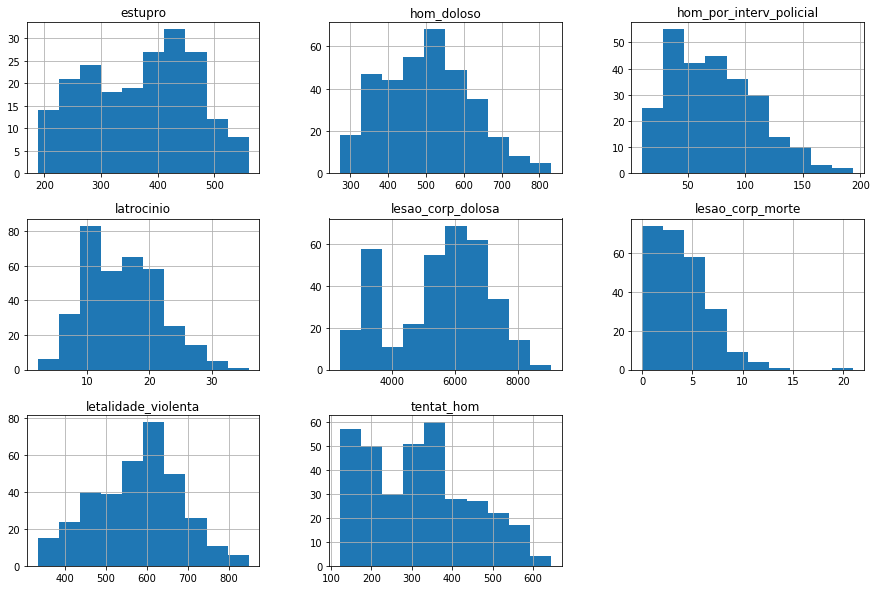

In [0]:
df_crimes_violentos.hist(figsize=(15,10));

Os histogramas para algumas das variáveis do grupo de crimes violentos confirma o que já tinha sido observado de que as variáveis são centradas na média. Mas alguns pontos são interessantes de serem observados:

* Pelas análises descritivas vimos que algumas variáveis apresentavam um valor máximo bem superior ao terceiro quartil, o que indicava que em algum períodos havia um salto no número de ocorrências. Por outro lado, pelo histograma vimos que temos um número alto de períodos onde o número de ocorrências é relativamente baixo, mas não o menor possível, como por exemplo para a variável de tentativa de homicídio, lesão corporal dolosa ou latrocínio. 
* Os períodos de salto no número de ocorrência por ser visto no histograma da variável de lesão corporal seguida de morte, onde há uma concentração de períodos com um número baixo de ocorrências, mas há alguns períodos onde houveram muitas ocorrências. 

#### Gráfico de linha

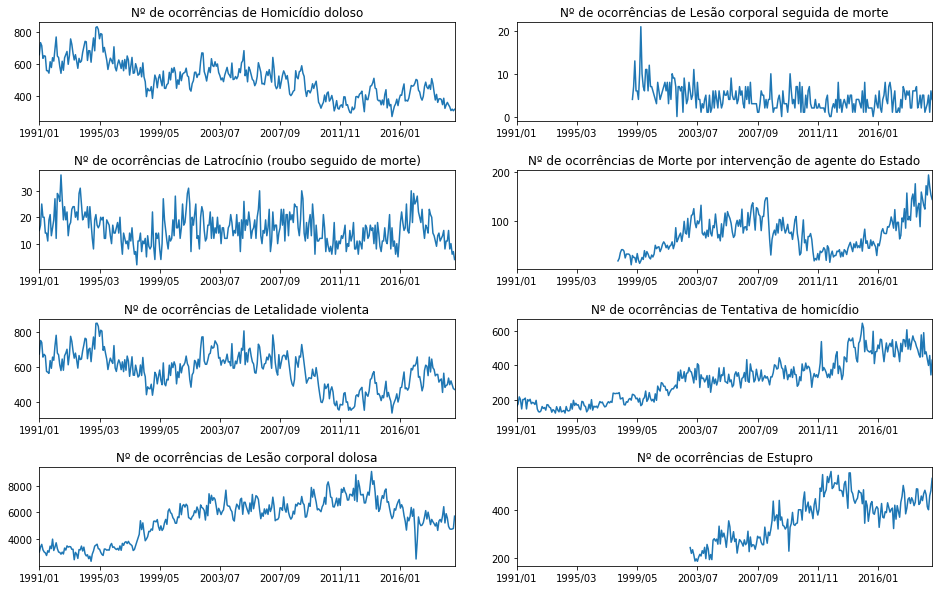

In [0]:
lista = ['hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro']
fig = plt.figure(figsize = [16, 10])
fig.subplots_adjust(hspace=0.5, wspace=0.15)
for item in lista:  
  ax = fig.add_subplot(4, 2, lista.index(item)+1)
  df[item].plot()
  ax.set_title('Nº de ocorrências de {}'.format(df_xlsx['Descrição da variável'][df_xlsx.index == item].to_string(index=False, header = False).strip()))
plt.show()

De acordo com o gráfico de linha, podemos observar que:

* O número de ocorrências de homicídio doloso tem apresentado uma tendência de queda.
* O número de casos de latrocínio não apresentam tendências de queda ou aumento, o número de casos varia em torno da média. O mesmo ocorre para a variável de número de ocorrências de lesão corporal seguida de morte, com exceção de um mês em específico logo no início da série.
* O número de ocorrências de morte por intervenção de agentes do estado têm apresentado uma tendência de crescimento, assim como para o número de ocorrências de estupro e de tentativa de homicídio.
* O número de ocorrências de letalidade violenta apresenta períodos em que a tendência é de queda, mas logo depois essa tendência se inverte.
* Para a variável do número de ocorrência de lesão corporal dolosa, a tendência era de um aumento, mas essa tendência acabou diminuindo nos últimos meses. Além disso, observa-se um período de queda bastante abrupta.

### Crimes de trânsito

#### Histograma

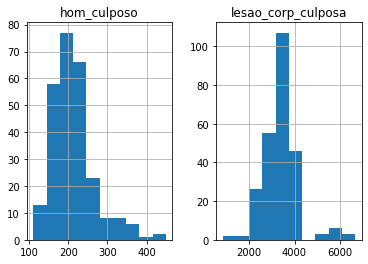

In [0]:
df_crimes_transito.hist();

O histograma das variáveis do número de ocorrências de crimes de trânsito confirmam o que era esperado: variáveis centradas na média mas com alguns períodos em que o número de ocorrências é elevado.

#### Gráfico de linha

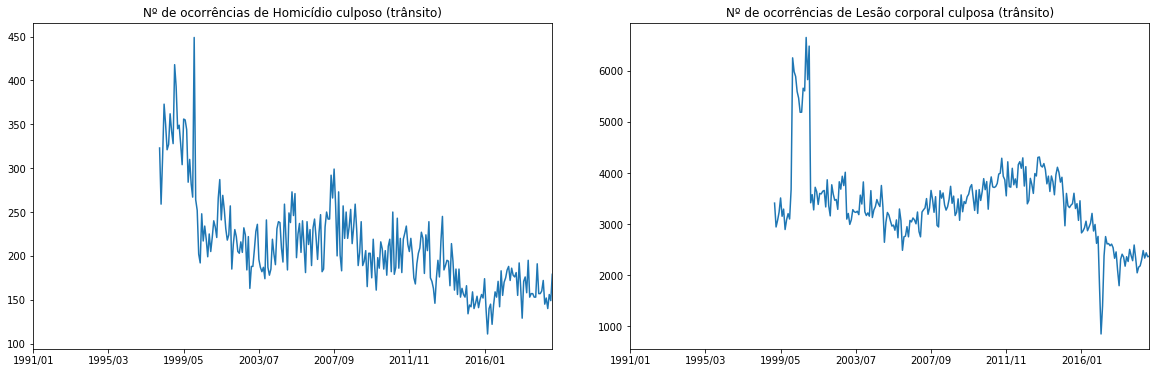

In [0]:
lista = ['hom_culposo', 'lesao_corp_culposa']
fig = plt.figure(figsize = [20, 6])
fig.subplots_adjust(hspace=0.5, wspace=0.15)
for item in lista:  
  ax = fig.add_subplot(1, 2, lista.index(item)+1)
  df[item].plot()
  ax.set_title('Nº de ocorrências de {}'.format(df_xlsx['Descrição da variável'][df_xlsx.index == item].to_string(index=False, header = False).strip()))
plt.show()

De acordo com o gráfico de linha do número de ocorrências de crimes de trânsito, a tendência para ambas as variáveis é de queda. Mas cabe ressaltar que há saltos no número de ocorrências logo no início das séries, além de uma queda acentuada em algum mês após 2016 para a variável do número de ocorrências de lesão corporal culposa. Interessante notar que essa queda é no mesmo período de uma queda acentuada na variável de lesão corporal dolosa vista anteriormente.

### Roubos

#### Histograma

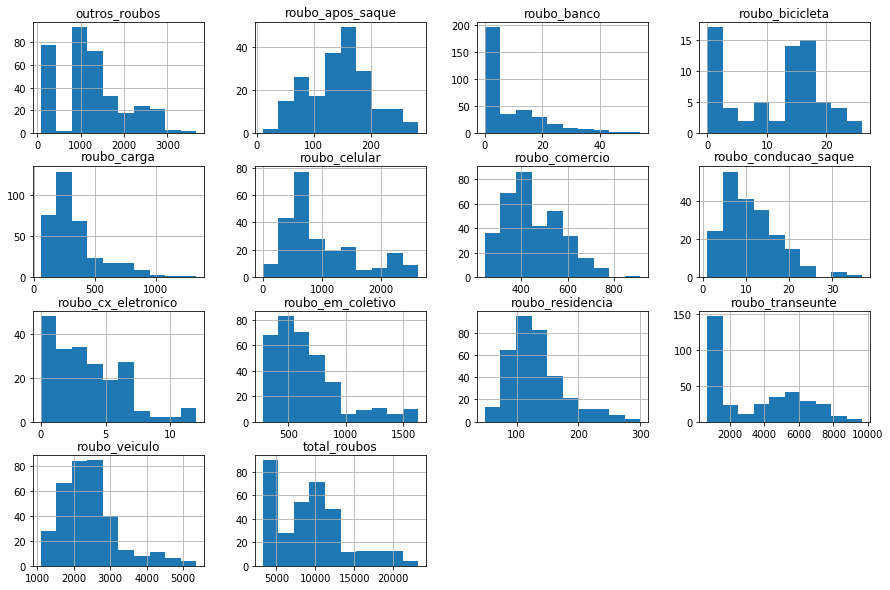

In [0]:
df_roubos.hist(figsize=(15,10));

De acordo com os histogramas das variáveis do número de ocorrências de roubo, é possível observar que a maioria possui uma distribuição mais concentrada a esquerda. Nesse caso há um número alto de meses em que o número de ocorrências é relativamente menor, ao mesmo tempo em que há poucos meses em que há um número alto de ocorrências criminais relativas a roubos. 

#### Gráfico de linha

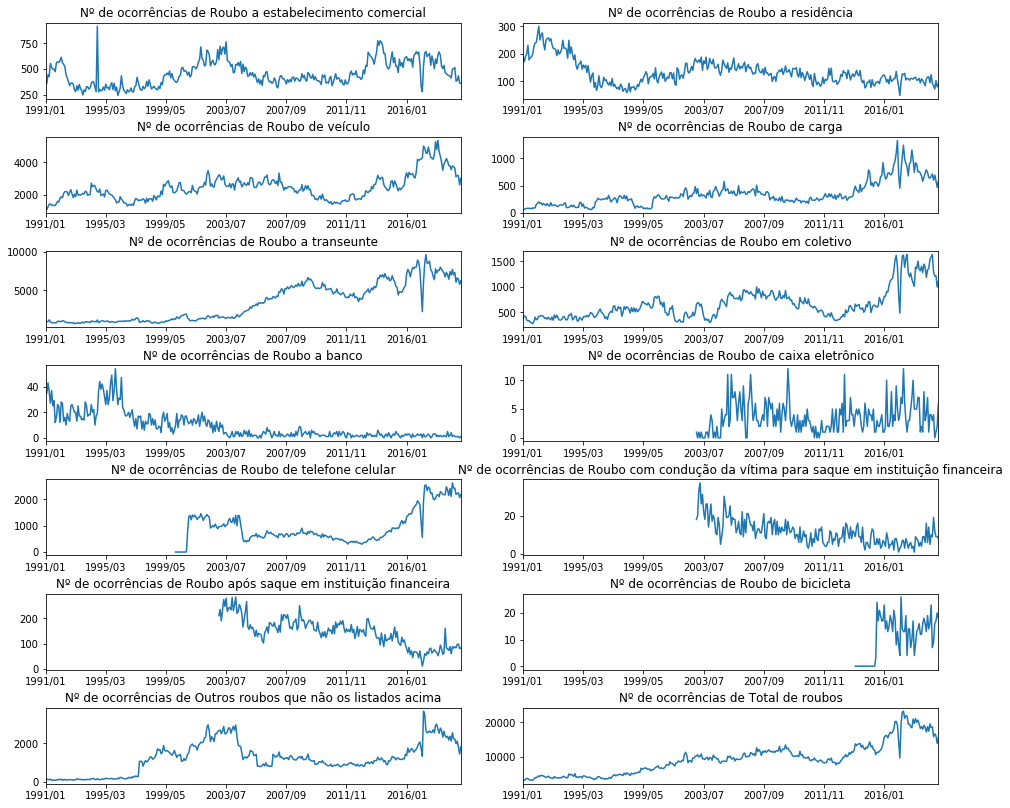

In [0]:
lista = ['roubo_comercio', 'roubo_residencia', 'roubo_veiculo', 'roubo_carga',
       'roubo_transeunte', 'roubo_em_coletivo', 'roubo_banco',
       'roubo_cx_eletronico', 'roubo_celular', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos']
fig = plt.figure(figsize = [16, 14])
fig.subplots_adjust(hspace=0.5, wspace=0.15)
for item in lista:  
  ax = fig.add_subplot(7, 2, lista.index(item)+1)
  df[item].plot()
  ax.set_title('Nº de ocorrências de {}'.format(df_xlsx['Descrição da variável'][df_xlsx.index == item].to_string(index=False, header = False).strip()))
plt.show()

De acordo com os gráficos de linhas das variáveis relativas ao número de ocorrências de roubo, podemos observar que:

* Nos últimos períodos analisados, a tendência do número de ocorrências de roubos é de aumento. 
* As exceções são observadas em roubos ligados a instituições financeiras, estabelecimentos comerciais ou residenciais.
* Para a variável relativa a roubos de bicicleta, a série ainda é muito curta para se observar uma tendência de crescimento ou queda.
* Para as variáveis relativas ao número de ocorrências de total de roubos, roubos de telefone celular, roubo a transeuntes, roubo em coletivos, roubo de carga, roubo de estabelecimento comercial e roubo a residências, tem-se uma queda abrupta em algum mês após 2016. O mesmo padrão foi observado anteriormente para outros tipos de ocorrências criminais.

### Furtos

#### Histograma

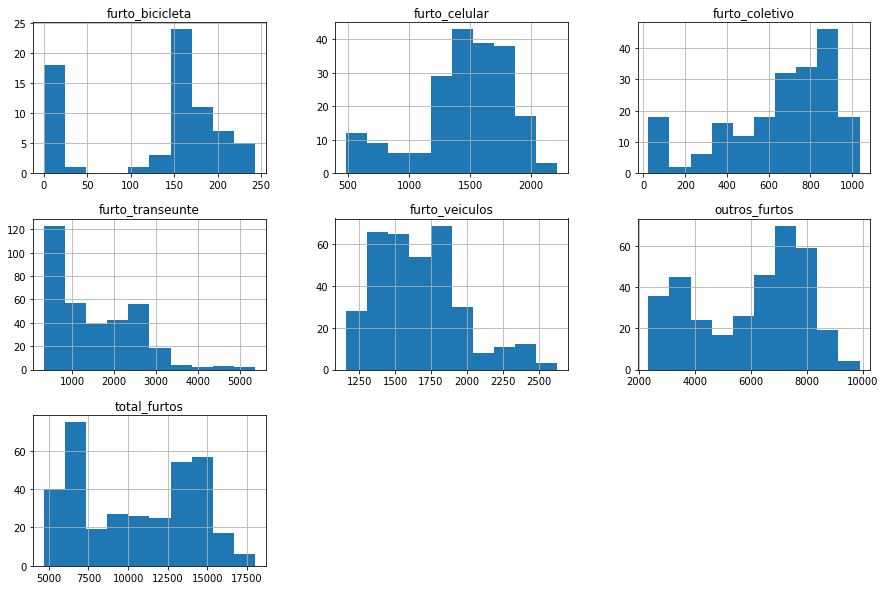

In [0]:
df_furtos.hist(figsize=(15,10));

Os histogramas das variáveis relacionadas ao número de ocorrências de furtos podem ser divididos em dois grupos:

* Um grupo que apresenta um maior número de meses com menos ocorrências criminais, como por exemplo nas variáveis de ocorrências de furto de transeunte e de veículo.
* Outro grupo com um maior número de meses com mais ocorrências criminais, como por exemplo nas variáveis de furto de bicicleta, de celular, em coletivo e outros furtos. 
* Essa distinção pode ser vista no histograma da variável do total de ocorrências de furto, dado que o mesmo apresenta dois picos no número de períodos, um com poucas ocorrências e o outro com mais ocorrências.

Quando analisamos as estatísticas descritivas, vimos que para a varíavel de furtos em coletivo não havia uma diferença significativa entre o terceiro quartil e o valor máximo, pelo histograma podemos ver o motivo. Em vários meses houve um número alto de ocorrências criminais.

#### Gráfico de linha

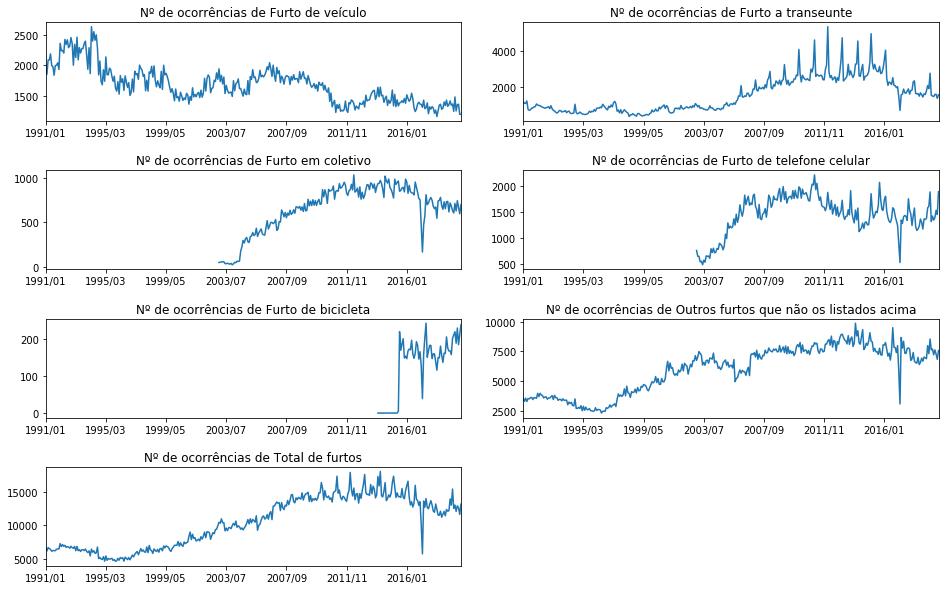

In [0]:
lista = ['furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos']
fig = plt.figure(figsize = [16, 10])
fig.subplots_adjust(hspace=0.5, wspace=0.15)
for item in lista:  
  ax = fig.add_subplot(4, 2, lista.index(item)+1)
  df[item].plot()
  ax.set_title('Nº de ocorrências de {}'.format(df_xlsx['Descrição da variável'][df_xlsx.index == item].to_string(index=False, header = False).strip()))
plt.show()

Analisando o gráfico de linha das variáveis relacionadas ao número de ocorrências de furtos temos que:

* A tendência do número de ocorrências de furto de veículos é de queda.
* A tendência do número de ocorrências de furto a transeuntes era de um aumento, mas essa tendência se invertou nos últimos meses. Além disso, é possível observar no gráfico da variável que existem certos períodos onde há um aumento mais significativo no número de casos de furto de celular.
* As demais variáveis relativas ao número de ocorrências de furto têm apresentado uma tendência de aumento.
* Assim como visto em outras variáveis, para variáveis do grupo relativo à ocorrências de furto, ocorre uma queda acentuada em algum período após 2016 no número de ocorrências de furto em coletivo, de telefone celular, de bicicletas, do total de furtos e de outros furtos.

### Crimes contra o patrimônio

#### Histograma

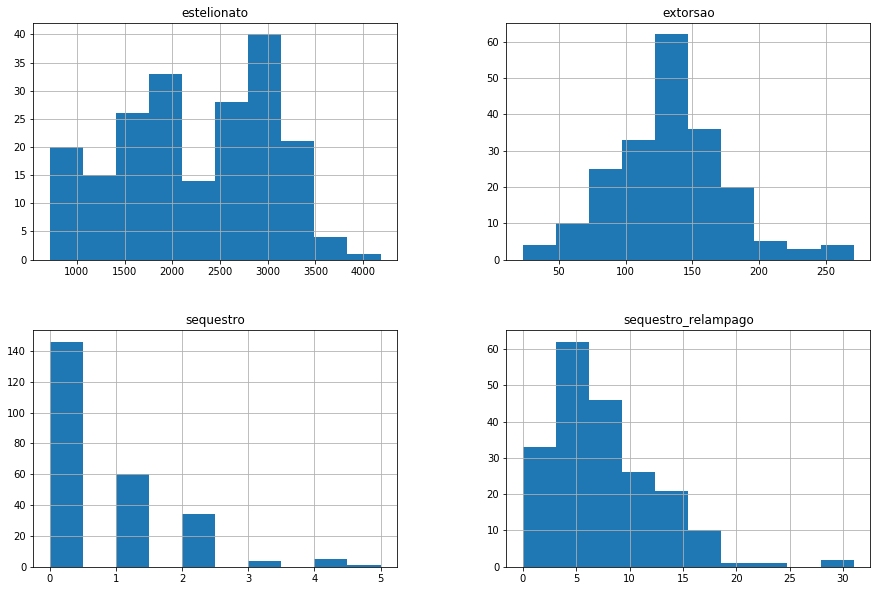

In [0]:
df_crimes_contra_patrimonio.hist(figsize=(15,10));

Nos histogramas das variáveis do número de ocorrências criminais relativas a crimes contra o patrimônio não há um padrão, cada histograma se comporta de uma forma.

* Na variável de casos de extorsão, é possível observar que a distribuição da série é bem centrada na média, não apresentando muitos períodos com pouca ou muita ocorrência registrada.
* Para a varíavel de sequestro relâmpago temos que na maioria dos períodos não houveram tantos casos registrados, mas houveram meses em que o número de ocorrências foi bem elevado.
* Na variável do número de ocorrências de sequestro, poucos casos foram registrados. Em poucos meses houveram 3 ou mais casos registrados.
* Em relação ao número de casos de estelionato, o histograma não apresenta uma distribuição bem definida.

#### Gráfico de linha

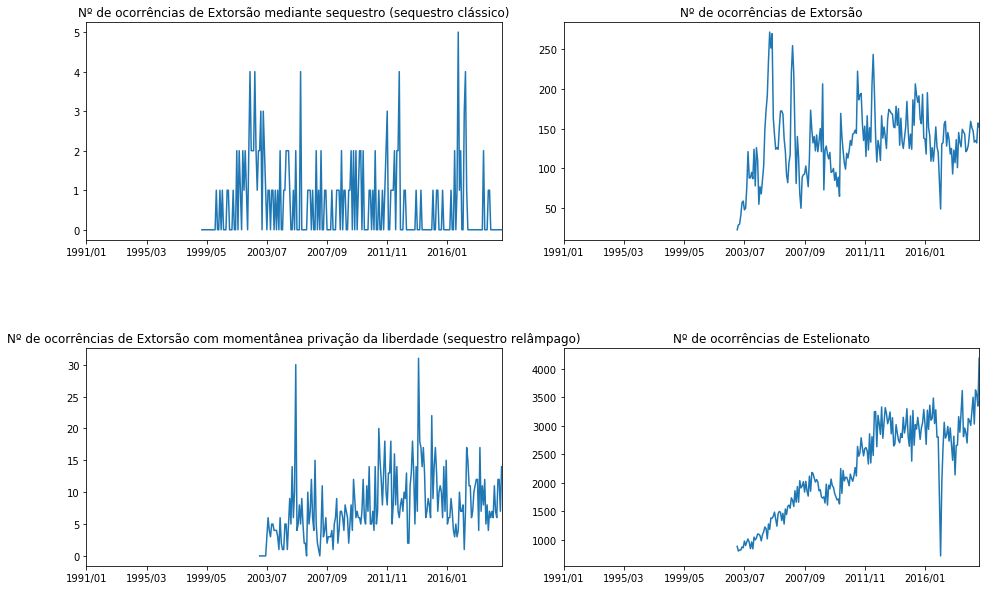

In [0]:
lista = ['sequestro', 'extorsao', 'sequestro_relampago', 'estelionato']
fig = plt.figure(figsize = [16, 10])
fig.subplots_adjust(hspace=0.5, wspace=0.15)
for item in lista:  
  ax = fig.add_subplot(2, 2, lista.index(item)+1)
  df[item].plot()
  ax.set_title('Nº de ocorrências de {}'.format(df_xlsx['Descrição da variável'][df_xlsx.index == item].to_string(index=False, header = False).strip()))
plt.show()

Analisando os gráficos para o número de ocorrências de crimes contra o patrimônio, não é possível perceber uma tendência bem definida. A exceção está no número de ocorrências de estelionato, que apresenta uma tendência de aumento no número de casos. Para essa variável também é possível perceber uma queda acentuada no número de casos em algum período após 2016.

### Atividade policial

#### Histograma

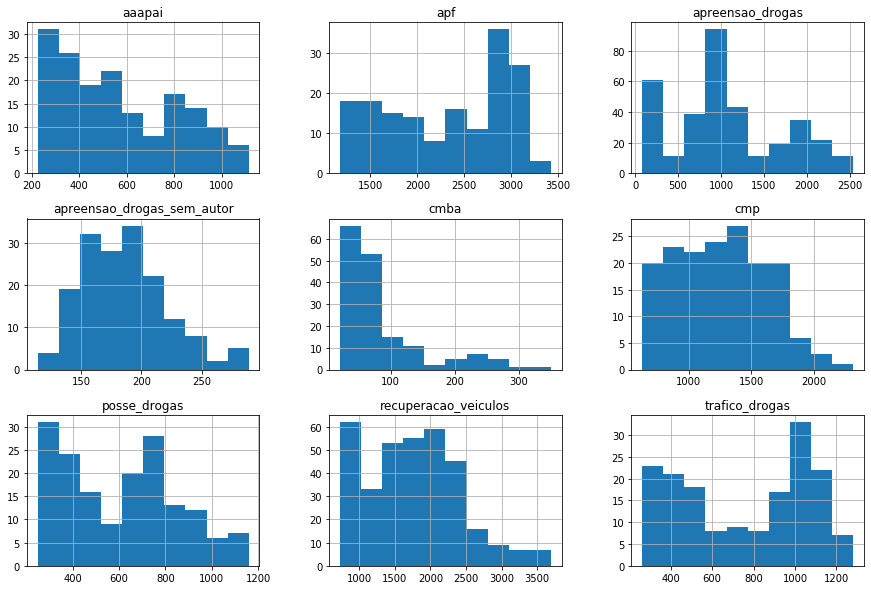

In [0]:
df_atividade_policial.hist(figsize=(15,10));

Assim como no grupo de variáveis do número de ocorrências de roubo, o grupo de variáveis do número de ocorrências de atividade policial não apresenta um padrão para todos os tipos de crime. Mas é possível dividir o comportamento das variáveis em grupos:

* Distribuição mais à esquerda, muitos meses com poucas ocorrências: auto de apreensão de adolescente por prática de ato infracional, apreensão de drogas, cumprimento de mandado de busca e apreensão, cumprimento de mandado de prisão, recuperação de veículos, posse de drogas e apreensão de drogas sem autor.
* Distribuição mais à direita, muitos meses com muitas ocorrências: auto de prisão em flagrante e tráfico de drogas.

#### Gráfico de linha

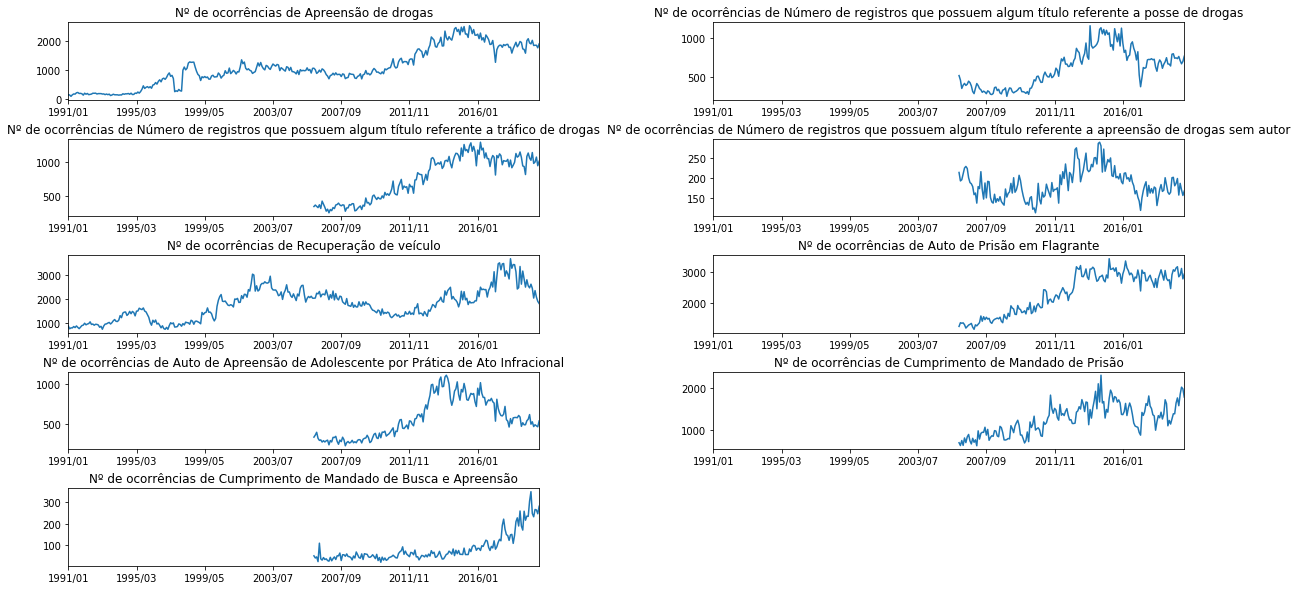

In [0]:
lista = ['apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba']
fig = plt.figure(figsize = [20, 10])
fig.subplots_adjust(hspace=0.5, wspace=0.37)
for item in lista:  
  ax = fig.add_subplot(5, 2, lista.index(item)+1)
  df[item].plot()
  ax.set_title('Nº de ocorrências de {}'.format(df_xlsx['Descrição da variável'][df_xlsx.index == item].to_string(index=False, header = False).strip()))
plt.show()

Para os últimos períodos, é possível perceber uma tendência de aumento no número de casos de busca e apreensão e mandado de prisão. Em relação as variáveis do número de casos de apreensão de drogas, tráfico de drogas, posse de drogas, prisão em flagrante a tendência é de estabilidade no número de casos. Para as variáveis do número de ocorrências de recuperação de veículos e apreensão de adolescente por prática de ato infracional, a tendência é de queda.

Para as variáveis do número de casos de posse e apreensão de drogas é possível observar a mesma queda acentuada que foi visualizada em outras variáveis.

### Outros registros

#### Histograma

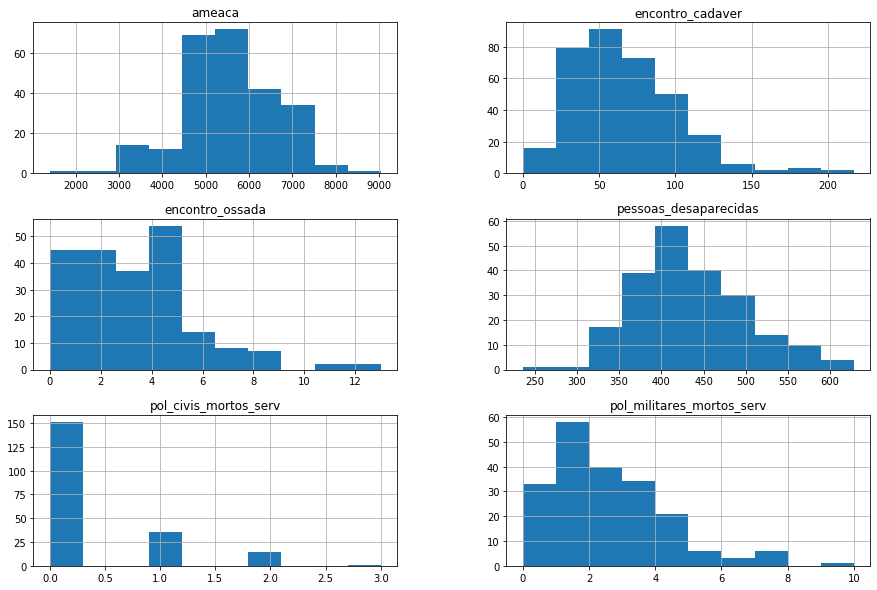

In [0]:
df_outros_registros.hist(figsize=(15,10));

Para o histograma do número de ocorrências de crimes que não são considerados em outros grupos, temos que:

* Para o número de casos de encontro de cadáver ou ossada e policiais militares mortos em serviço, observa-se que os histogramas são distribuídos à esquerda, ou seja, na maioria dos meses analisados, o número de ocorrências foi baixo.
* Para o número de ocorrências de ameaças, observa-se que a série é centrada na média, em metade dos períodos houve um número de casos menor que a média e na outra metade dos períodos houve um número de casos maior que a média.
* Para o número de policiais militares mortos em serviços, houveram poucos meses em que essa ocorrências foi registrada. Esse fato já tinha sido observado pela análise estatística descritiva.

#### Gráfico de linha

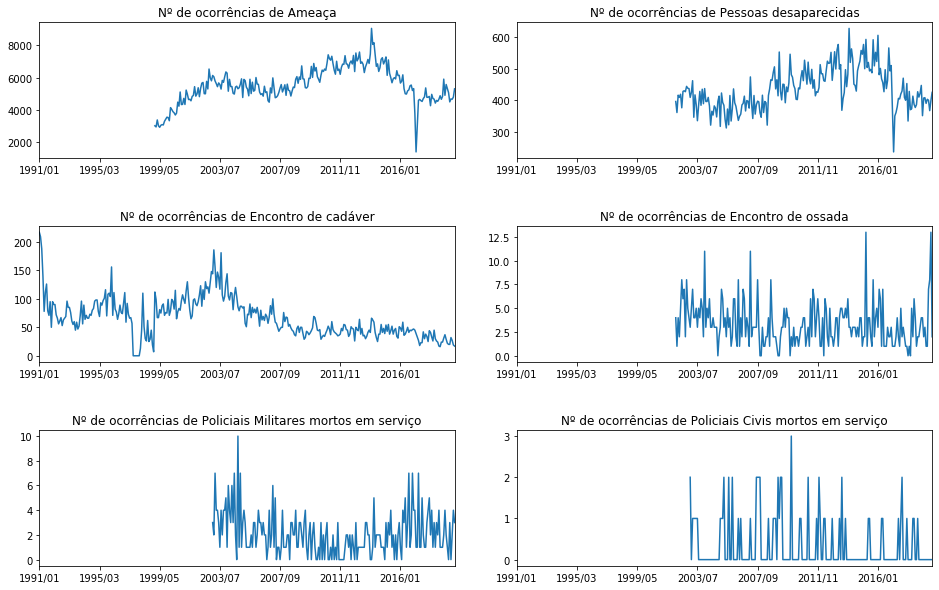

In [0]:
lista = ['ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv']
fig = plt.figure(figsize = [16, 10])
fig.subplots_adjust(hspace=0.5, wspace=0.15)
for item in lista:  
  ax = fig.add_subplot(3, 2, lista.index(item)+1)
  df[item].plot()
  ax.set_title('Nº de ocorrências de {}'.format(df_xlsx['Descrição da variável'][df_xlsx.index == item].to_string(index=False, header = False).strip()))
plt.show()

De acordo com os gráficos é possível observar que o número de casos de encontro de cadáver tem apresentado uma queda desde o início dos anos 2000. Além disso, o número de ocorrências de ameaça e pessoas vinham apresentando uma queda, mas nos últimos meses esse valor se estabilizou. Para as demais variáveis não é possível observar uma tendência clara de aumento ou queda no número de casos.

Para as variáveis do número de casos de ameaça e de pessoas desaparecidas, podemos observar a queda acentuada no mesmo período que algumas das variáveis já analisadas.

### Indicadores de criminalidade

#### Histograma

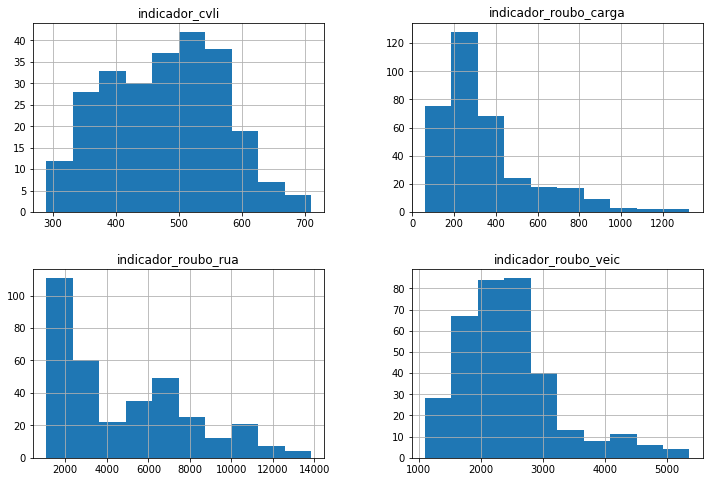

In [0]:
df_indicadores.hist(figsize=(12,8));

Com exceção da variável do indicador estratégico para crimes violentos letais intencionais, os histogramas dos indicadores estratégicos apresentam uma distribuição à direita, ou seja, dentro do período analisado existem mais meses que apresentam indicadores baixos do que altos.

#### Gráfico de linha

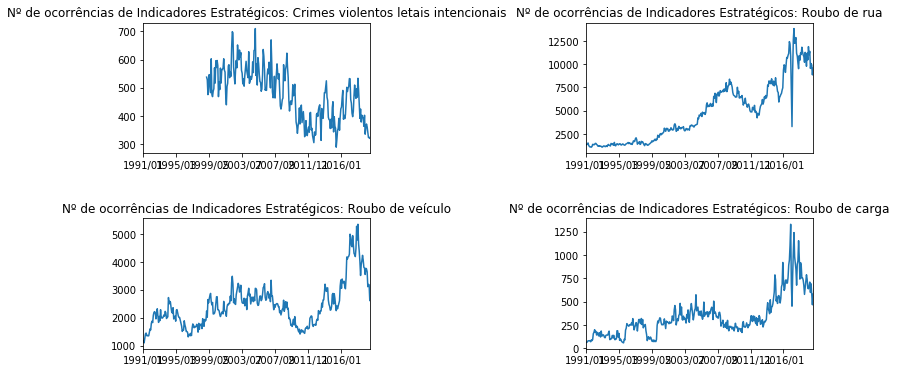

In [0]:
lista = ['indicador_cvli',
       'indicador_roubo_rua', 'indicador_roubo_veic', 'indicador_roubo_carga']
fig = plt.figure(figsize = [12, 6])
fig.subplots_adjust(hspace=0.5, wspace=0.95)
for item in lista:  
  ax = fig.add_subplot(2, 2, lista.index(item)+1)
  df[item].plot()
  ax.set_title('Nº de ocorrências de {}'.format(df_xlsx['Descrição da variável'][df_xlsx.index == item].to_string(index=False, header = False).strip()))
plt.show()

Em relação aos indicadores de criminalidade é possível observar uma tendência de queda para crimes violentos letais intencionais, roubo de veículo e roubo de carga. 

Para o indicador de roubo de rua a tendência é de aumento. Além disso, percebe-se a mesma queda acentuada em um mês após 2016.


### Registro de ocorrências

#### Histograma

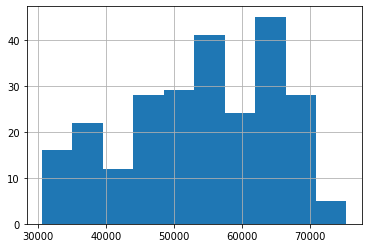

In [0]:
df['registro_ocorrencias'].hist()

Para o histograma da variável do número total de ocorrências registradas é possível observar uma distribuição tendendo mais a direita, ou seja, a maioria dos meses apresenta um valor mais alto de ocorrências registradas.

#### Gráfico de linha

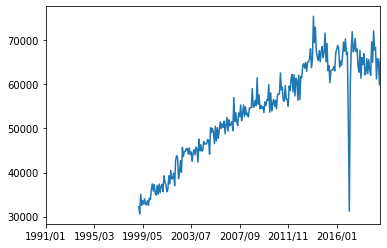

In [0]:
fig = plt.figure(figsize = [6, 4])
df['registro_ocorrencias'].plot()
ax.set_title('Nº de ocorrências de {}'.format(df_xlsx['Descrição da variável'][df_xlsx.index == 'registro_ocorrencias'].to_string(index=False, header = False).strip()))
plt.show()

Analisando todo o gráfico do número de registros de ocorrências criminais é possível observar uma tendência de aumento. Porém, nos últimos meses essa tendência está começando a se inverter. 

Além disso, pelo gráfico fica muito claro a queda abrupta em um mês após 2016. Nesse caso é importante entender o que ocorreu nesse período para que diversas variáveis de número de ocorrências tenha diminuído de forma tão acentuada.

### O que aconteceu naquele mês após 2016?

Analisando os gráficos de linha dos tipos de ocorrências criminais registradas, foi possível perceber que na maioria dos casos houve uma queda acentuada em um mês após 2016. Essa característica foi observada em variáveis de todos os grupos de tipos criminais. Para visualizar que essa queda foi no mesmo período para diferentes variáveis, no gráfico a seguir estão *plotadas* conjuntamente as séries do número de ocorrências registradas, foi utilizada uma variável de cada grupo de tipo criminal, além da variável do total dos registros de ocorrências.

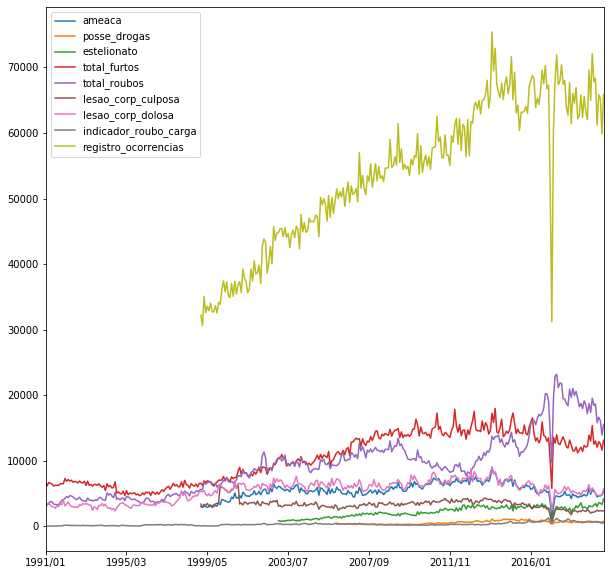

In [0]:
df[['ameaca','posse_drogas','estelionato','total_furtos','total_roubos',
    'lesao_corp_culposa','lesao_corp_dolosa','indicador_roubo_carga','registro_ocorrencias']].plot(figsize = (10,10));

De acordo com o gráfico é possível afirmar que o período de queda foi o mesmo para diferentes variáveis. Mas a questão é: em que mês essa queda ocorreu e o que aconteceu nesse mês que fez o número de ocorrências registradas cair tanto?

In [0]:
df[['ameaca','posse_drogas','estelionato','total_furtos','total_roubos','lesao_corp_culposa','lesao_corp_dolosa','registro_ocorrencias']].loc['2016/01':'2017/12']

,ameaca,posse_drogas,estelionato,total_furtos,total_roubos,lesao_corp_culposa,lesao_corp_dolosa,registro_ocorrencias
2016/01,5660.0,935.0,3042.0,15912,15673,2827.0,6317,67980.0
2016/02,5767.0,815.0,2673.0,16559,16153,2865.0,6570,68785.0
2016/03,6167.0,843.0,3271.0,14172,16194,2929.0,6356,68196.0
2016/04,5317.0,712.0,2936.0,13033,15511,3056.0,5767,63881.0
2016/05,4999.0,765.0,3360.0,13516,16421,2869.0,5333,65276.0
2016/06,4981.0,781.0,3097.0,12734,17112,2940.0,4677,64330.0
2016/07,5178.0,925.0,3129.0,13281,16833,3019.0,5636,66294.0
2016/08,5239.0,952.0,3484.0,15951,17217,3209.0,5368,69548.0
2016/09,5489.0,869.0,3038.0,13867,18063,2864.0,5679,67474.0
2016/10,5537.0,820.0,3279.0,13703,20225,2992.0,6366,70271.0


Filtrando o `DataFrame` e exibindo somente os registros de 2016 e 2017, o que é uma vantagem por ter configurado o index de acordo com a data, é possível observar que essa queda acentuada ocorreu em fevereiro de 2017. O número total de registros teve 20000 ocorrências a menos do que o mês anterior.

Se olharmos um calendário qualquer, vamos ver que fevereiro de 2017 teve 28 dias. Se um mês é menor em número, o número de ocorrências registradas também é menor. 

O problema é que fevereiro de 2018 também só teve 28 dias. E não foi observado uma queda acentuada além da de fevereiro de 2017. A razão da queda com certeza é outra.

O policiamento nesse mês pode ter sido melhor, o que diminuiu o número de crimes. Mas uma pesquisa rápida no *Google* sobre fevereiro de 2017 nos mostra reportagens como: 

* [Segurança pública vive crise no Rio](https://noticias.r7.com/rio-de-janeiro/seguranca-publica-vive-crise-no-rio-30072017).
* [RJ fecha 2017 com maior taxa de mortes violentas dos últimos 8 anos](https://noticias.uol.com.br/cotidiano/ultimas-noticias/2018/01/18/rio-fecha-2017-com-maior-taxa-de-mortes-violentas-dos-ultimos-oito-anos.htm?cmpid=copiaecola).
* [RJ teve 68 casos de feminicídios em 2017; média é de 5 casos por mês](https://g1.globo.com/rj/rio-de-janeiro/noticia/rj-teve-68-casos-de-feminicidios-em-2017-media-e-de-5-casos-por-mes.ghtml).

Se a queda no número de ocorrências não foi por causa da quantidade de dias no mês e nem por causa da melhoria da segurança pública, o que houve em fevereiro de 2017?

Greve dos policiais.

Continuando a pesquisa em notícias de 2017, encontrei essa reportagem de abril de 2017:

* [Polícia Civil suspende greve após 78 dias de paralisação](https://g1.globo.com/rio-de-janeiro/noticia/policia-civil-suspende-greve-apos-78-dias-de-paralisacao.ghtml).

Se em abril os policiais civis acabaram com uma greve de 78 dias, em fevereiro eles estavam de greve. Procurando mais sobre essa greve encontrei essas reportagens:

* [Policiais civis do RJ fazem paralisação, diz sindicato](https://g1.globo.com/rio-de-janeiro/noticia/policiais-civis-do-rj-fazem-paralisacao-diz-sindicato.ghtml).
* [90% das delegacias do Rio de Janeiro estão em greve, afirmam policiais civis](https://www.brasildefato.com.br/2017/02/07/90-das-delegacias-do-rio-de-janeiro-estao-em-greve-afirmam-policiais-civis/)
* [Greve da polícia no RJ deixa mulher ameaçada e idosa atropelada sem atendimento](https://noticias.uol.com.br/cotidiano/ultimas-noticias/2017/03/11/greve-da-policia-no-rio-deixa-mulher-ameacada-e-idosa-atropelada-sem-atendimento.htm).

Segundo essas reportagens, os policiais civis do estado do Rio de Janeiro começaram a greve em janeiro de 2017, e durante a greve somente casos graves como homicídio, estupro e sequestro eram registrados nas delegacias.

Então a queda no número de ocorrências em fevereiro de 2017 não foi resultado de um acaso no número de dias do mês ou de uma melhora no policiamento, e sim porquê os crimes não eram registrados. Se analisarmos o número de ocorrências de homicídio, estupro e sequestro podemos observar que realmente não houve queda em fevereiro de 2017 para esses crimes. 

## Conclusão

Tendo concluída a análise das séries históricas do número de ocorrências registradas, disponibilizadas pelo Instituto de Segurança Pública do estado do Rio de Janeiro, podemos fazer as seguintes conclusões:

* O volume de informações disponibilizadas é bem alto. Não é comum vermos séries históricas mensais desde 1991 sem interrupção. Além disso, a documentação dos dados é muito boa e o dicionário de variáveis é bem completo.
* Quanto aos dados, podemos perceber que as séries não apresentam um padrão entre elas. O que realmente é difícil de ocorrer, já que são 56 séries para diferentes tipos de crimes. 
* Existem séries que apresentam uma distribuição mais centrada na média, onde em metade dos meses o número de ocorrências foi menor que a média e a outra metade apresentou um número de ocorrências maior que a média. 
* Também há séries com distribuição mais à esquerda, onde na maioria dos meses o número de ocorrências foi relativamente baixo, e séries à direita, onde na maioria dos meses o número de ocorrências foi elevado.
* Também há casos em que foi possível observar períodos em que o número de ocorrências foi muito elevado, representando saltos no número de ocorrências.
* Em relação a tendência no número de ocorrências, foi observado que o total de registros vinha apresentando uma tendência de aumento, mas que nos últimos períodos essa tendência começa a se inverter.
* Outra característica importante foi vista na variável de morte de policiais em serviço, onde houve mais casos de policiais militares mortos do que policiais civis. Esse fato ressalta a diferença no tipo de serviço que cada instituição realiza.
* Por fim, a característica que mais chamou à atenção foi a queda acentuada no número de ocorrências em fevereiro de 2017, independentemente do tipo de crime. Após uma pesquisa, foi concluído que a razão dessa queda não foi uma diminuição no número de crimes, e sim uma queda nos registros, dado que a policia civil estava em greve no período.

O objetivo aqui foi fazer uma análise geral dos dados disponibilizados pelo Instituto de Segurança Pública do estado do Rio de Janeiro pela iniciativa ISP Dados Abertos. A coleta e disponibilização de dados é de suma importância para a melhoria de políticas públicas. Por exemplo, analisando os gráficos das séries é possível observar alguns saltos no número de ocorrências. É interessante observar se esses saltos sempre ocorrem no mesmo mês, ou seja, se há uma sazonalidade no número de ocorrências. Se for observado que existe essa sazonalidade, o Instituto de Segurança Pública pode aumentar o policiamento nesses períodos. 

Entretanto, temos que chamar atenção para o caso de fevereiro de 2017. Uma pessoa qualquer poderia dizer que houve uma diminuição da criminalidade naquele mês. O que não é verdade, o que houve foi uma diminuição nos registros criminais. Os crimes provavelmente ainda estavam ocorrendo, mas não houve o registro. 

A iniciativa do Instituto de Segurança Pública é bastante válida, e espero que o instituto consiga disponibilizar cada vez mais dados. Quanto mais dados, melhores serão as informações, os *insights*, os modelos e as tomadas de decisão. Mas devemos sempre nos atentar ao contexto dos dados.